# Preprocessing

In [1]:
import pandas as pd
import numpy as np
#Used for pretty printing
from pprint import pprint


In [2]:
df = pd.read_csv("Data/headlinesViews.csv")
df.head()

,Unnamed: 0,title,homesection,publishdate,pageviews,popularity
0,18976,Fem danskere i Touren: Sunweb udtager Søren Kragh,Cykling,2018-07-02 17:41:01 UTC,1499,0
1,31594,Klæstrup gift i moské: Jeg er så lykkelig,Danske kendte,2018-08-13 17:40:39 UTC,227329,1
2,10062,Teenager druknet efter skub i leg: Nu er kamme...,112,2018-06-02 09:57:02 UTC,85556,1
3,23137,It-fejl i europæisk flyveplansystem er rettet,Samfund,2018-04-04 00:10:44 UTC,1346,0
4,7639,Voldtaget to timer på loftet over café: - Jeg ...,112,2018-08-06 20:42:12 UTC,303642,1


In [3]:
df.shape

(31518, 6)

In [4]:
df.popularity.value_counts()

1    15799
0    15719
Name: popularity, dtype: int64

In [5]:
df.drop(["Unnamed: 0", "publishdate","homesection","pageviews"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31518 entries, 0 to 31517
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       31518 non-null  object
 1   popularity  31518 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 492.6+ KB


In [6]:
df['title'].nunique() #Distinct values

31518

In [7]:
df['popularity'].nunique() #Distinct values

2

In [8]:
# Make everything lowercase
df["title"] = df["title"].str.lower()
df

,title,popularity
0,fem danskere i touren: sunweb udtager søren kragh,0
1,klæstrup gift i moské: jeg er så lykkelig,1
2,teenager druknet efter skub i leg: nu er kamme...,1
3,it-fejl i europæisk flyveplansystem er rettet,0
4,voldtaget to timer på loftet over café: - jeg ...,1
...,...,...
31513,helt til hest: politiet mangler borgernes hjæl...,0
31514,kæmpe ballade under pokalfinale: politiet brug...,1
31515,lavede sexbånd med kardashian: jeg er videre,0
31516,politiet bekræfter: nu skal ronaldo afhøres,1


In [9]:
# Remove all punctuation
df['title'] = df['title'].str.replace('[^\w\s]','')
df['title'].head()

0     fem danskere i touren sunweb udtager søren kragh
1             klæstrup gift i moské jeg er så lykkelig
2    teenager druknet efter skub i leg nu er kammer...
3         itfejl i europæisk flyveplansystem er rettet
4    voldtaget to timer på loftet over café  jeg vi...
Name: title, dtype: object

In [10]:
from nltk.corpus import stopwords

stop = stopwords.words('danish')
print(stop)


['og', 'i', 'jeg', 'det', 'at', 'en', 'den', 'til', 'er', 'som', 'på', 'de', 'med', 'han', 'af', 'for', 'ikke', 'der', 'var', 'mig', 'sig', 'men', 'et', 'har', 'om', 'vi', 'min', 'havde', 'ham', 'hun', 'nu', 'over', 'da', 'fra', 'du', 'ud', 'sin', 'dem', 'os', 'op', 'man', 'hans', 'hvor', 'eller', 'hvad', 'skal', 'selv', 'her', 'alle', 'vil', 'blev', 'kunne', 'ind', 'når', 'være', 'dog', 'noget', 'ville', 'jo', 'deres', 'efter', 'ned', 'skulle', 'denne', 'end', 'dette', 'mit', 'også', 'under', 'have', 'dig', 'anden', 'hende', 'mine', 'alt', 'meget', 'sit', 'sine', 'vor', 'mod', 'disse', 'hvis', 'din', 'nogle', 'hos', 'blive', 'mange', 'ad', 'bliver', 'hendes', 'været', 'thi', 'jer', 'sådan']


In [11]:
# Show amount of stop words
df['stopwords'] = df['title'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['title','stopwords']].head()

,title,stopwords
0,fem danskere i touren sunweb udtager søren kragh,1
1,klæstrup gift i moské jeg er så lykkelig,3
2,teenager druknet efter skub i leg nu er kammer...,4
3,itfejl i europæisk flyveplansystem er rettet,2
4,voldtaget to timer på loftet over café jeg vi...,8


In [12]:
# Remove stop words
df['title'] = df['title'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['title'].head()

0     fem danskere touren sunweb udtager søren kragh
1                    klæstrup gift moské så lykkelig
2          teenager druknet skub leg kammerat sigtet
3            itfejl europæisk flyveplansystem rettet
4    voldtaget to timer loftet café straffe fortjent
Name: title, dtype: object

In [13]:
# Get the 10 most common words
### Should this be all words above X count? Or something else?
freq = pd.Series(' '.join(df['title']).split()).value_counts()[:10]
freq

dansk      1380
kan         973
mand        854
så          781
ny          774
får         720
ved         618
år          612
danmark     599
danske      595
dtype: int64

In [14]:
# Remove the 10 most common words as they're not useful when classifying our data 
# (This allows us to catch some additional "stop words" not in our stop word library)
freq = list(freq.index)
df['title'] = df['title'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['title'].head()

0     fem danskere touren sunweb udtager søren kragh
1                       klæstrup gift moské lykkelig
2          teenager druknet skub leg kammerat sigtet
3            itfejl europæisk flyveplansystem rettet
4    voldtaget to timer loftet café straffe fortjent
Name: title, dtype: object

In [15]:
df['title'].nunique() #Distinct values
df

,title,popularity,stopwords
0,fem danskere touren sunweb udtager søren kragh,0,1
1,klæstrup gift moské lykkelig,1,3
2,teenager druknet skub leg kammerat sigtet,1,4
3,itfejl europæisk flyveplansystem rettet,0,2
4,voldtaget to timer loftet café straffe fortjent,1,8
...,...,...,...
31513,helt hest politiet mangler borgernes hjælp nye...,0,2
31514,kæmpe ballade pokalfinale politiet brugte tåre...,1,2
31515,lavede sexbånd kardashian videre,0,3
31516,politiet bekræfter ronaldo afhøres,1,2


In [16]:
df.popularity.value_counts()

1    15799
0    15719
Name: popularity, dtype: int64

# Iteration 1 - DummyC, LogisticRegression, LinearSVC, RandomForest, DecisionTreeClassifier

In [17]:
# Split our training set into a 75% 25% train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.title, df.popularity, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((23638,), (7880,), (23638,), (7880,))

In [18]:
# Use TF-IDF method
from sklearn.feature_extraction.text import TfidfVectorizer
vect_new = TfidfVectorizer(min_df=5).fit(X_train)
tfid_x_train = vect_new.transform(X_train)
tfid_x_test = vect_new.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dummyC = DummyClassifier(strategy="most_frequent").fit(tfid_x_train, y_train)
print("Dummy Classifer")
print("Training set score: {:.3f}".format(dummyC.score(tfid_x_train, y_train)))
print("Test set score: {:.3f}".format(dummyC.score(tfid_x_test, y_test)))
print("-------------------------------------------")

logreg = LogisticRegression(max_iter=10000).fit(tfid_x_train, y_train)
print("Logistic Regression")
print("Training set score: {:.3f}".format(logreg.score(tfid_x_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(tfid_x_test, y_test)))
print("-------------------------------------------")

linearsvc = LinearSVC(max_iter=10000).fit(tfid_x_train, y_train)
print("Linear SVC")
print("Training set score: {:.3f}".format(linearsvc.score(tfid_x_train, y_train)))
print("Test set score: {:.3f}".format(linearsvc.score(tfid_x_test, y_test)))
print("-------------------------------------------")

dtc = DecisionTreeClassifier().fit(tfid_x_train, y_train)
print("Decision Tree")
print("Training set score: {:.3f}".format(dtc.score(tfid_x_train, y_train)))
print("Test set score: {:.3f}".format(dtc.score(tfid_x_test, y_test)))
print("-------------------------------------------")

rfc = RandomForestClassifier().fit(tfid_x_train, y_train)
print("Random Forest")
print("Training set score: {:.3f}".format(rfc.score(tfid_x_train, y_train)))
print("Test set score: {:.3f}".format(rfc.score(tfid_x_test, y_test)))
print("-------------------------------------------")

Dummy Classifer
Training set score: 0.502
Test set score: 0.498
-------------------------------------------
Logistic Regression
Training set score: 0.763
Test set score: 0.672
-------------------------------------------
Linear SVC
Training set score: 0.779
Test set score: 0.658
-------------------------------------------
Decision Tree
Training set score: 0.985
Test set score: 0.616
-------------------------------------------
Random Forest
Training set score: 0.985
Test set score: 0.646
-------------------------------------------


# Iteration 2 - Lemmatization & Stemming + Ngram testing

In [20]:
# Due to Lemmatization & Stemming not being used in the final version, 
# please see Lemmatization_Stemming.ipynb

### Unigrams and Bigrams

In [21]:
vect_new = TfidfVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)
tfid_x_train = vect_new.transform(X_train)
tfid_x_test = vect_new.transform(X_test)

In [22]:
logreg = LogisticRegression(max_iter=10000).fit(tfid_x_train, y_train)
print("Logistic Regression")
print("Training set score: {:.3f}".format(logreg.score(tfid_x_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(tfid_x_test, y_test)))
print("-------------------------------------------")

linearsvc = LinearSVC(max_iter=10000).fit(tfid_x_train, y_train)
print("Linear SVC")
print("Training set score: {:.3f}".format(linearsvc.score(tfid_x_train, y_train)))
print("Test set score: {:.3f}".format(linearsvc.score(tfid_x_test, y_test)))
print("-------------------------------------------")

rfc = RandomForestClassifier().fit(tfid_x_train, y_train)
print("Random Forest")
print("Training set score: {:.3f}".format(rfc.score(tfid_x_train, y_train)))
print("Test set score: {:.3f}".format(rfc.score(tfid_x_test, y_test)))
print("-------------------------------------------")

Logistic Regression
Training set score: 0.768
Test set score: 0.669
-------------------------------------------
Linear SVC
Training set score: 0.788
Test set score: 0.659
-------------------------------------------
Random Forest
Training set score: 0.985
Test set score: 0.645
-------------------------------------------


### Unigrams, Bigrams and Trigrams

In [23]:
vect_new = TfidfVectorizer(min_df=5, ngram_range=(1,3)).fit(X_train)
tfid_x_train = vect_new.transform(X_train)
tfid_x_test = vect_new.transform(X_test)

In [24]:
logreg = LogisticRegression(max_iter=10000).fit(tfid_x_train, y_train)
print("Logistic Regression")
print("Training set score: {:.3f}".format(logreg.score(tfid_x_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(tfid_x_test, y_test)))
print("-------------------------------------------")

linearsvc = LinearSVC(max_iter=10000).fit(tfid_x_train, y_train)
print("Linear SVC")
print("Training set score: {:.3f}".format(linearsvc.score(tfid_x_train, y_train)))
print("Test set score: {:.3f}".format(linearsvc.score(tfid_x_test, y_test)))
print("-------------------------------------------")

rfc = RandomForestClassifier().fit(tfid_x_train, y_train)
print("Random Forest")
print("Training set score: {:.3f}".format(rfc.score(tfid_x_train, y_train)))
print("Test set score: {:.3f}".format(rfc.score(tfid_x_test, y_test)))
print("-------------------------------------------")

Logistic Regression
Training set score: 0.768
Test set score: 0.670
-------------------------------------------
Linear SVC
Training set score: 0.788
Test set score: 0.658
-------------------------------------------
Random Forest
Training set score: 0.985
Test set score: 0.645
-------------------------------------------


### Bigrams and Trigrams

In [25]:
vect_new = TfidfVectorizer(min_df=5, ngram_range=(2,3)).fit(X_train)
tfid_x_train = vect_new.transform(X_train)
tfid_x_test = vect_new.transform(X_test)

In [26]:
logreg = LogisticRegression(max_iter=10000).fit(tfid_x_train, y_train)
print("Logistic Regression")
print("Training set score: {:.3f}".format(logreg.score(tfid_x_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(tfid_x_test, y_test)))
print("-------------------------------------------")

linearsvc = LinearSVC(max_iter=10000).fit(tfid_x_train, y_train)
print("Linear SVC")
print("Training set score: {:.3f}".format(linearsvc.score(tfid_x_train, y_train)))
print("Test set score: {:.3f}".format(linearsvc.score(tfid_x_test, y_test)))
print("-------------------------------------------")

rfc = RandomForestClassifier().fit(tfid_x_train, y_train)
print("Random Forest")
print("Training set score: {:.3f}".format(rfc.score(tfid_x_train, y_train)))
print("Test set score: {:.3f}".format(rfc.score(tfid_x_test, y_test)))
print("-------------------------------------------")

Logistic Regression
Training set score: 0.557
Test set score: 0.543
-------------------------------------------
Linear SVC
Training set score: 0.557
Test set score: 0.542
-------------------------------------------
Random Forest
Training set score: 0.562
Test set score: 0.541
-------------------------------------------


### Only Bigrams

In [27]:
vect_new = TfidfVectorizer(min_df=5, ngram_range=(2,2)).fit(X_train)
tfid_x_train = vect_new.transform(X_train)
tfid_x_test = vect_new.transform(X_test)

In [28]:
logreg = LogisticRegression(max_iter=10000).fit(tfid_x_train, y_train)
print("Logistic Regression")
print("Training set score: {:.3f}".format(logreg.score(tfid_x_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(tfid_x_test, y_test)))
print("-------------------------------------------")

linearsvc = LinearSVC(max_iter=10000).fit(tfid_x_train, y_train)
print("Linear SVC")
print("Training set score: {:.3f}".format(linearsvc.score(tfid_x_train, y_train)))
print("Test set score: {:.3f}".format(linearsvc.score(tfid_x_test, y_test)))
print("-------------------------------------------")

rfc = RandomForestClassifier().fit(tfid_x_train, y_train)
print("Random Forest")
print("Training set score: {:.3f}".format(rfc.score(tfid_x_train, y_train)))
print("Test set score: {:.3f}".format(rfc.score(tfid_x_test, y_test)))
print("-------------------------------------------")

Logistic Regression
Training set score: 0.556
Test set score: 0.543
-------------------------------------------
Linear SVC
Training set score: 0.557
Test set score: 0.543
-------------------------------------------
Random Forest
Training set score: 0.562
Test set score: 0.541
-------------------------------------------


### Only Trigrams

In [29]:
vect_new = TfidfVectorizer(min_df=5, ngram_range=(3,3)).fit(X_train)
tfid_x_train = vect_new.transform(X_train)
tfid_x_test = vect_new.transform(X_test)

In [30]:
logreg = LogisticRegression(max_iter=10000).fit(tfid_x_train, y_train)
print("Logistic Regression")
print("Training set score: {:.3f}".format(logreg.score(tfid_x_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(tfid_x_test, y_test)))
print("-------------------------------------------")

linearsvc = LinearSVC(max_iter=10000).fit(tfid_x_train, y_train)
print("Linear SVC")
print("Training set score: {:.3f}".format(linearsvc.score(tfid_x_train, y_train)))
print("Test set score: {:.3f}".format(linearsvc.score(tfid_x_test, y_test)))
print("-------------------------------------------")

rfc = RandomForestClassifier().fit(tfid_x_train, y_train)
print("Random Forest")
print("Training set score: {:.3f}".format(rfc.score(tfid_x_train, y_train)))
print("Test set score: {:.3f}".format(rfc.score(tfid_x_test, y_test)))
print("-------------------------------------------")

Logistic Regression
Training set score: 0.505
Test set score: 0.500
-------------------------------------------
Linear SVC
Training set score: 0.505
Test set score: 0.500
-------------------------------------------
Random Forest
Training set score: 0.505
Test set score: 0.500
-------------------------------------------


# Iteration 3 - Improving LogisticRegression, LinearSVC and RandomForest

In [31]:
#Resetting tfid_x_train and tfid_x_test 
vect_new = TfidfVectorizer(min_df=5).fit(X_train)
tfid_x_train = vect_new.transform(X_train)
tfid_x_test = vect_new.transform(X_test)

## RandomForest

In [32]:
# Due to the runtime (and the fact it ends up worse than LogReg & LinearSVC) 
# of RandomForest optimising, it has been added in a separate file 
# called "RandomForest.ipynb"

## LogisticRegression

In [33]:
C_values = []
starting_value = 0.0001
ending_value = 100
current_value = starting_value
multiplier1 = 5
multiplier2 = 2
lastMultiplication = 0
while current_value <= ending_value:
    C_values.append(current_value)
    if lastMultiplication == multiplier1:
        current_value = current_value * multiplier2
        lastMultiplication = multiplier2
    else:
        current_value = current_value * multiplier1
        lastMultiplication = multiplier1

print(C_values)

[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]


c:\users\laust\appdata\local\programs\python\python38\lib\site-packages\sklearn\externals\six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "
c:\users\laust\appdata\local\programs\python\python38\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Best cross-validation score: 0.6658
Best parameters:
{'logisticregression__C': 0.5}


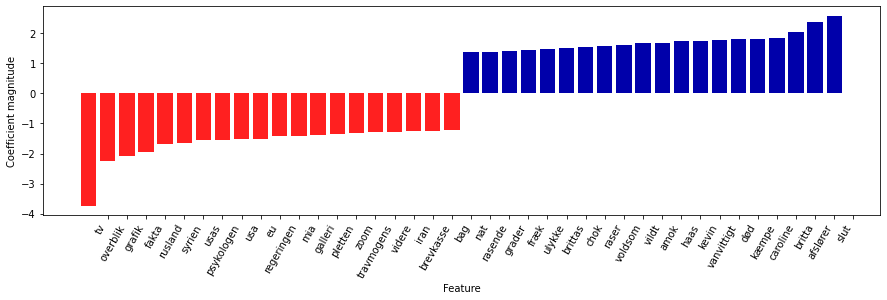

In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import mglearn

pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(max_iter=10000))

#Test with 5 different values of C
param_grid = {"logisticregression__C": C_values}

#Cross validate with 5 folds for each value of C
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

#Print best scores
print("Best cross-validation score: {:.4f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

#Get the best features (both positive and negative) based on their coefficient values
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_

#Visualize the coefficients
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=20)

## LinearSVC

In [35]:
C_values = []
starting_value = 0.0001
ending_value = 100
current_value = starting_value
multiplier1 = 5
multiplier2 = 2
lastMultiplication = 0
while current_value <= ending_value:
    C_values.append(current_value)
    if lastMultiplication == multiplier1:
        current_value = current_value * multiplier2
        lastMultiplication = multiplier2
    else:
        current_value = current_value * multiplier1
        lastMultiplication = multiplier1

print(C_values)

[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]


Best cross-validation score: 0.6669
Best parameters:
{'linearsvc__C': 0.05}


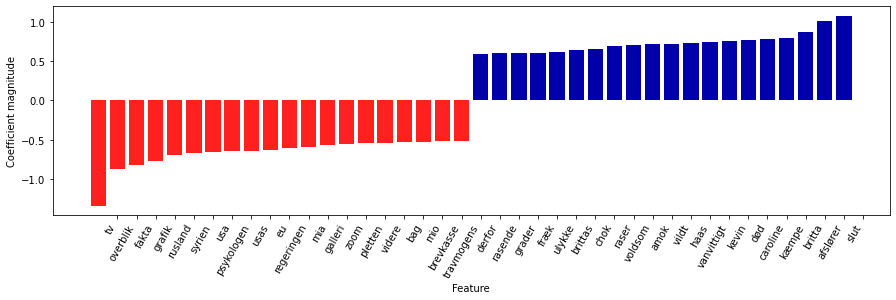

In [36]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LinearSVC(max_iter=10000))

#Test with 5 different values of C
param_grid = {"linearsvc__C": C_values}

#Cross validate with 5 folds for each value of C
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

#Print best scores
print("Best cross-validation score: {:.4f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

#Get the best features (both positive and negative) based on their coefficient values
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['linearsvc'].coef_

#Visualize the coefficients
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=20)

# Evaluation

In [38]:
from sklearn.metrics import confusion_matrix
logreg = LogisticRegression(C=0.5).fit(tfid_x_train, y_train)
linearsvc = LinearSVC(C=0.05).fit(tfid_x_train, y_train)
pred_logreg = logreg.predict(tfid_x_test)
pred_linearsvc = linearsvc.predict(tfid_x_test)
logreg_confusion = confusion_matrix(y_test, pred_logreg)
linearsvc_confusion = confusion_matrix(y_test, pred_linearsvc)
dummyc_confusion = confusion_matrix(y_test, dummyC.predict(tfid_x_test))
print("Dummy Classifier")
print("Training set score: {:.3f}".format(dummyC.score(tfid_x_train, y_train)))
print("Test set score: {:.3f}".format(dummyC.score(tfid_x_test, y_test)))
print("\nConfusion Matrix")
print("{}".format(logreg_confusion))
print("\n----------------------------------\n")
print("Logistic Regression")
print("Training set score: {:.3f}".format(logreg.score(tfid_x_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(tfid_x_test, y_test)))
print("\nConfusion Matrix")
print("{}".format(logreg_confusion))
print("\n----------------------------------\n")
print("Linear SVC")
print("Training set score: {:.3f}".format(linearsvc.score(tfid_x_train, y_train)))
print("Test set score: {:.3f}".format(linearsvc.score(tfid_x_test, y_test)))
print("\nConfusion Matrix")
print("{}".format(linearsvc_confusion))

Dummy Classifier
Training set score: 0.502
Test set score: 0.498

Confusion Matrix
[[2595 1362]
 [1236 2687]]

----------------------------------

Logistic Regression
Training set score: 0.753
Test set score: 0.670

Confusion Matrix
[[2595 1362]
 [1236 2687]]

----------------------------------

Linear SVC
Training set score: 0.751
Test set score: 0.672

Confusion Matrix
[[2601 1356]
 [1230 2693]]
